# Matplotlib: the Python (default) plotting library

Copyright 2022 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).

> **Goal**:  
> Learn the basics of the Matplotlib library and use the examples to expand our knowledge of the Python language  
>  
> **What it is?**  
Matplotlib is the standard data visualization tool in Python. It allows creating static, animated and interactive visualizations. Many other Python visualization tools (e.g. seaborn) are built on top of Matplotlib. See https://matplotlib.org/   
>
> **What it is used for?**  
Analize, explore, and show relationships between data.
>
> **Useful resources**  
> https://matplotlib.org/ (official website)  
> https://matplotlib.org/stable/index.html (official documentation website)  
> https://matplotlib.org/cheatsheets/ (official matplolib cheatsheets)  
> https://matplotlib.org/stable/gallery/index.html (official matplotlib gallery with example plots)  
> [Basics of Data Visualisation in Python Using Matplotlib](https://thepythoncodingbook.com/basics-of-data-visualisation-in-python-using-matplotlib/) from "The Python Coding Book"  

## Getting started with matplotlib

### Making your first plot

The first thing to do is to import pyplot, which is a submodule of matplotlib that allows you to create interactive figures. We are also going to import matplotlib which we will use later to change some default features of the plots. We do it in the following way by Python standards

In [1]:
# to make plots you would normally import the pyplot submodule as follows
import matplotlib.pyplot as plt

# you may also import matplotlib, though this is normally used to change library defaults, etc.
import matplotlib as mpl

Let's create our first plot

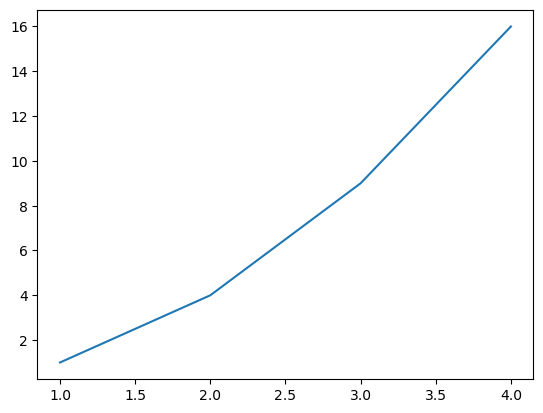

In [2]:
# generate some data
a = [1, 2, 3, 4]
b = [1, 4, 9, 16]

# make a simple plot using the MATLAB-like interface (normally used for one-liners)
plt.plot(a, b)

> Depending on the IDE you are using, you may need to use the ``plt.show()`` command to display the figures. This is not necessary here since by default Jupyter notebooks use the so-called "inline backend" which means that the plots are shown automatically within the document.

### Customising the plot

You can customise the plot by adding, for example, the type of marker, its size, labels and titles (almost anything you can think of really). For this you can use the different parameters provided by the various built-in functions of the pyplot submodule (i.e. plt.) or add new functions as the example below shows

Text(0, 0.5, 'here we use Latex: $x^2$')

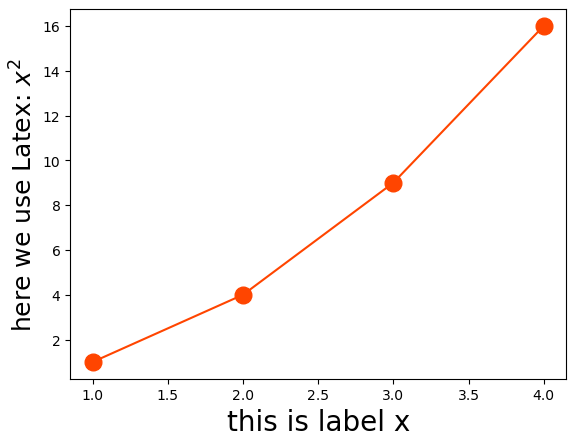

In [3]:
plt.plot(a, b, marker='o', color='orangered', markersize=12)  # here we set the type of marker, its color, and its size using different parameters fo the plot() function
plt.xlabel('this is label x', fontsize=20)                    # here we add the label of the axis x calling "xlabel()" and set the font size
plt.ylabel('here we use Latex: $x^2$', fontsize=18)           # here we set the label of the axis y calling "ylabel()" and set the font size

another example, this time plotting and histogram

Text(0.5, 0, 'some variable')

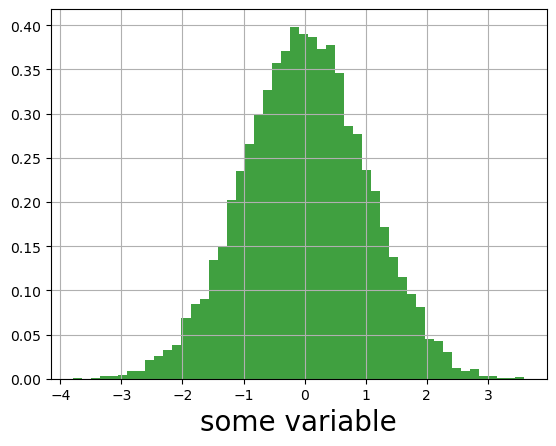

In [4]:
import numpy as np

# generate a normal population of size 10_000
normal = np.random.randn(10000)

plt.hist(normal, 50, density=True, facecolor='green', alpha=0.75)
plt.grid(True)
plt.xlabel('some variable', fontsize=20)

You can call the ``plot()``  or any other type of plot function (e.g. hist, scatter, bar...) as many times as you want, **by default** matplolib will keep adding data to the same figure

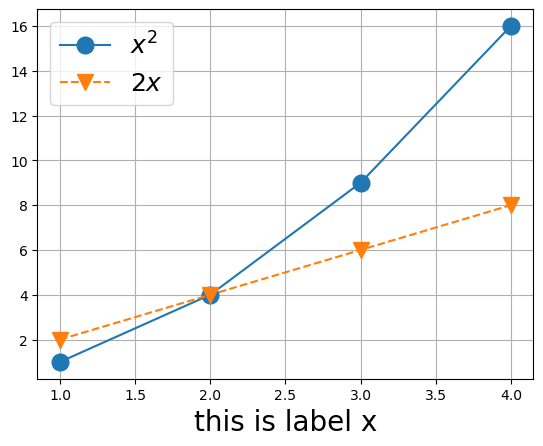

In [5]:
# first call
plt.plot(a, b, marker='o', markersize=12, label='$x^2$')

# second call
plt.plot(a, [2, 4, 6, 8], 'v--', markersize=12, label='$2x$')

plt.grid(True)
plt.xlabel('this is label x', fontsize=20)
plt.legend(fontsize=18)

## The matplotlib object-oriented interface

Originally matplolib was created to mimic the way MATLAB programming language creates figures. This is called the state-based or MATLAB-like interface. This interface, used in all the examples above, tries to imitate the MATLAB syntax by just adding the ``plt.`` before stating the MATLAB-like methods, for example, ``plt.scatter`` instead of ``scatter`` and so on. The main difference between MATLAB and Matplolib is that by default matplolib will keep adding data to the same figure unless you create a new figure and MATLAB does the opposite. This state-based interface is useful (and fine) to generate simple plots quickly but if you need to have full control and a deeper understanding of the figure you should use the OO interface instead. Matplolib strongly promotes the use of this interface and here we agree, so we are going to go deeper into it.

> In the past, most matplolib users (who usually came from MATLAB) used the state-based interface and due to this most examples on the internet (apart from the official matplotlib documentation) are state-based. This trend is fortunately changing. However, when you search for matplolib examples on the web you will find examples of both types of interfaces. This has brought a lot of confusion for newcomers, as in the past most tutorials did not explain that these two types of interfaces exist. Now you have been warned.

All the main parts of a matplolib figure are depicted in the "anatomy of a figure" below.

![anatomy](https://raw.githubusercontent.com/marcoalopez/Python_course/main/notebooks/imgs/sphx_glr_anatomy_002.webp)  
_Figure 1. Anatomy of a matplolib plot as depicted in the official matplolib documentation_

To avoid confusion, we will clarify the elements that may confuse newcomers the most.

- **Figure** is like the canvas that contains all the elements of the final figure.
- **Axes** is the area where the data will be rendered. You can have from one to many axes as you like per figure.
- **Axis** the x- and y-axis of a 2D plot. Each axe of the figure can have two or three Axis.

The first thing to do to create a figure in the OO interface is to call the function ``subplots()`` as follows

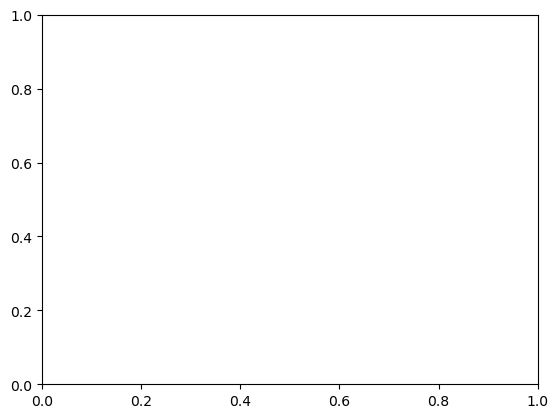

In [6]:
# a single (one Axe) empty figure (showing the graphic primitives)
fig, ax = plt.subplots()

Note that the ``subplot()`` function returs two different objects, the figure and the axes, in this case one axe.

In [7]:
fig, ax

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

Now, let's create a slightly more complex figure with two axes

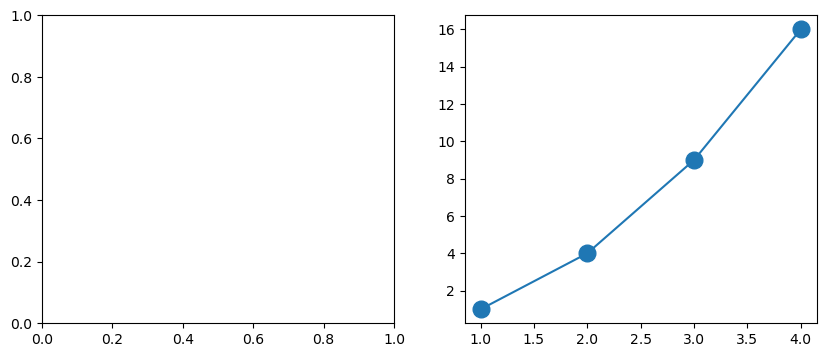

In [8]:
# a two column (2 axes) empty figure (in this example we use a tuple to unpack the axes)
fig, (ax_left, ax_right) = plt.subplots(ncols=2, figsize=(10, 4))

# plot something in the right axe
ax_right.plot(a, b, marker='o', markersize=12)

or even with more axes

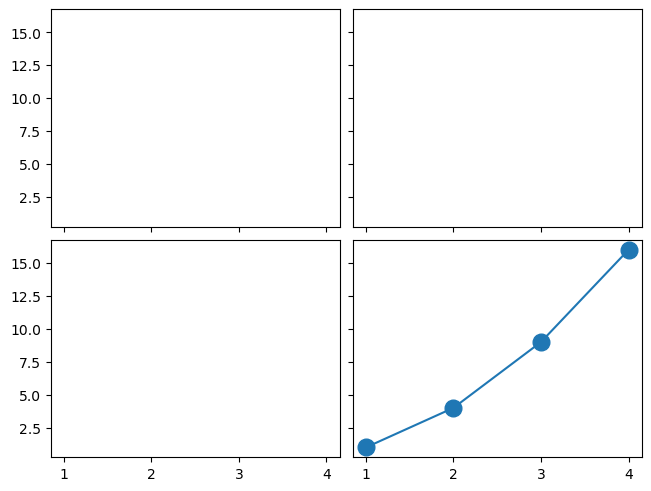

In [9]:
# create an empty figure with two columns and two rows with shared x and y axis
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, constrained_layout=True)

# plot something in the (2, 2) axe
axes[1,1].plot(a, b, marker='o', markersize=12, label='$x^2$')

In this last example, let us dwell on some important details. In previous examples we unpacked the different axes using a tuple (e.g. ``(ax_left, ax_right)`` but in this case all the axes are contained within the variable/object called ``axes``. Let's see

In [10]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

As we can see, axes contains a list with two sublists containing each of the axes (each sublist represents one row). To access each of them individually we can use the Python indexing. This is precisely what we are doing in the example above when we use ``axes[1,1].plot``, more specifically, we are indicating that we want to display the data in the axe that corresponds to the element with index 1 of the list with index 1 (remember that Python indexes from 0). An alternative would be to unpack the different axes in the following way

In [11]:
((ax1, ax2), (ax3, ax4)) = axes

Now the ``axes[1,1]`` would have been reassigned as ``ax4``. You can do as you prefer, the only real advantage of the first approach is that it allows you to loop over the axes, saving you code in some specific cases. We'll see some examples of this later.

So far, we have used different parameters within the subplots function to control different elements of the figure. These are the most important ones you should be aware of:

 - ``figsize`` the width and height of the figure in inches. By default (6.4, 4.8).
 - ``dpi``: the resolution of the figure in dots-per-inch. Default is 100.
 - ``ncols, nrows``: number of columns and rows, respectively.
 - ``sharex, sharey``: Share the x and/or y axis. Bool, default is False
 - ``constrained_layout``: automatically adjusts subplots and decorations like legends and colorbars so that they fit in the figure window while still preserving, as best they can, the logical layout requested by the user. Bool, default is False.

 > To control the resolution of the figure in pixels you must play with the ``figsize`` and ``dpi`` of the figure at the same time.

 For complex layouts, matplotlib offers several options but one of the simplest and sadly underused is to use the ``subplot_mosaic()`` function as follows

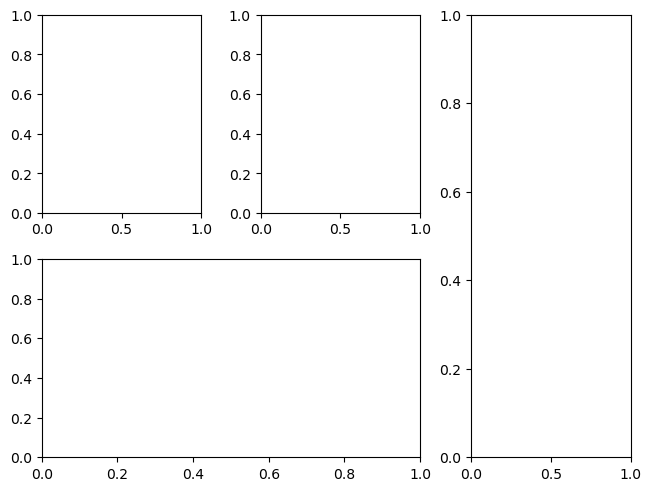

In [12]:
mosaic ="""ABD
           CCD"""

fig, axs = plt.subplot_mosaic(mosaic, constrained_layout=True)

alternatively you can use a list of lists to produce the same output, for example

```python
mosaic = [['a)', 'b)', 'd)'], ['c)', 'c)', 'd)']]
```
the string ``'.'`` allows you to leave a space empty.

more examples:  
https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#sphx-glr-tutorials-intermediate-arranging-axes-py  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html

---

Now, let customise a plot using the OO interface

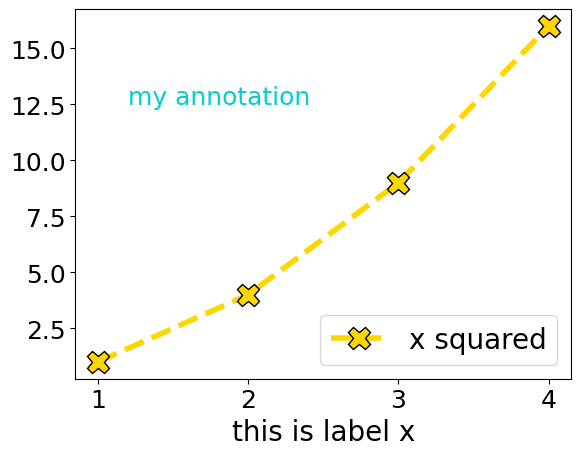

In [13]:
fig, ax = plt.subplots()

ax.plot(a, b, color='gold', marker='X', markersize=16, markeredgecolor='black', linestyle='dashed', linewidth=4, label='x squared')

# add the x axis labels
ax.set_xlabel('this is label x', fontsize=20)

# add text to axe
ax.text(x=1.2, y=12.5, s='my annotation', fontsize=18, color='darkturquoise')

# add legend
ax.legend(loc='lower right', fontsize=20)

# modify the size of the tick labels
ax.tick_params(axis='both', labelsize=18)

As you can see, it is a matter of adding new elements to specific ``axes``.

### Save your figure

You may have noticed that we have never used the object ``fig``. This is normal, as most of the time you will be dealing with axes. An example where you will use this _figure object_ is when you want to save a figure on your hard disk. This is done using the ``savefig()`` method as follows

In [14]:
fig.savefig('figure01.png', dpi=96, bbox_inches='tight')

In this case, we specify the name of the file ``figure01``and the format ``.png`` using a string, the resolution in dpi, and a parameter to ensure that no element of the figure is cut. By default, the file will be saved in the same folder where you have the Jupyter notebook, you can specify full or relative addresses without any problem. For example, using ``'figures/figure01.png'`` will create the folder _figures_ and then store de _figure01_ there. As any other functions, the ``savefig()`` function allows you to control a number of features through different parameters, you can see the options here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html  

## More examples using matplolib

Now that you have an idea of how to make basic figures with matplotlib, let's focus on using matplolib as a vehicle to learn about programming and data science using Python and improve our skills with this library in the process.

### Example 1

TODO


### Example 2

TODO

## Going further

TODO

In [15]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Matplotlib', mpl.__version__)

Notebook tested in 2022-09-03 using:
Python 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
Matplotlib 3.5.2
